## Chapter 2

### 2.3 통계학에서의 표본분포

In [71]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

In [72]:
loans_income = pd.read_csv('../gunwo/dataset/loans_income.csv')

In [73]:
loans_income = loans_income['x']

In [74]:
type(loans_income)

pandas.core.series.Series

In [75]:
sample_data = pd.DataFrame({
    'income' : loans_income.sample(1000),
    'type' : 'Data',
})

In [76]:
sample_mean_05 = pd.DataFrame({
    'income' : [loans_income.sample(5).mean() for _ in range(1000)],
    'type' : 'Mean of 5',
})

In [77]:
sample_mean_05

,income,type
0,91014.4,Mean of 5
1,77800.0,Mean of 5
2,36459.0,Mean of 5
3,46600.0,Mean of 5
4,57800.0,Mean of 5
...,...,...
995,55080.0,Mean of 5
996,55800.0,Mean of 5
997,82400.0,Mean of 5
998,58360.0,Mean of 5


In [78]:
sample_mean_20 = pd.DataFrame({
    'income' : [loans_income.sample(20).mean() for _ in range(1000)],
    'type' : 'Mean of 20',
})

In [79]:
sample_mean_20

,income,type
0,60983.95,Mean of 20
1,60620.00,Mean of 20
2,61483.55,Mean of 20
3,71419.30,Mean of 20
4,71340.00,Mean of 20
...,...,...
995,61029.80,Mean of 20
996,72680.00,Mean of 20
997,59798.70,Mean of 20
998,62821.40,Mean of 20


        income  type
2008   30000.0  Data
17083  12000.0  Data
37440  33000.0  Data
36178  65000.0  Data
48593  62000.0  Data


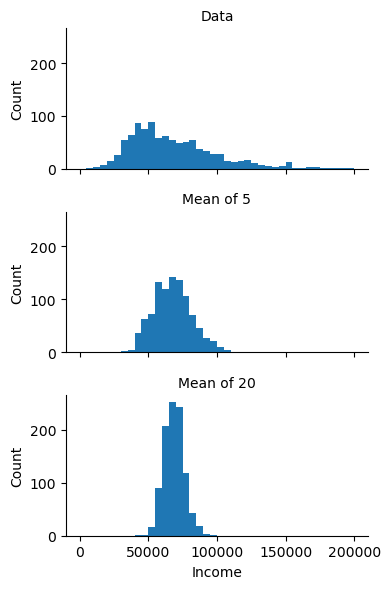

In [80]:
results = pd.concat([sample_data, sample_mean_05, sample_mean_20])
print(results.head())

g = sns.FacetGrid(results, col='type', col_wrap=1, 
                  height=2, aspect=2)
g.map(plt.hist, 'income', range=[0, 200000], bins=40)
g.set_axis_labels('Income', 'Count')
g.set_titles('{col_name}')

plt.tight_layout()
plt.show()

### 2.4 부트스트랩

In [81]:
## The Bootstrap

results = []
for nrepeat in range(1000):
    sample = resample(loans_income)
    results.append(sample.median())
results = pd.Series(results)
print('Bootstrap Statistics:')
print(f'original: {loans_income.median()}')
print(f'bias: {results.mean() - loans_income.median()}')
print(f'std. error: {results.std()}')


Bootstrap Statistics:
original: 62000.0
bias: -92.44799999999668
std. error: 246.48102704405517


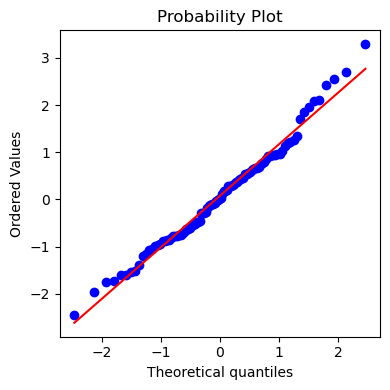

In [82]:
fig, ax = plt.subplots(figsize=(4, 4))

norm_sample = stats.norm.rvs(size=100)
stats.probplot(norm_sample, plot=ax)

plt.tight_layout()
plt.show()

NameError: name 'stats' is not defined

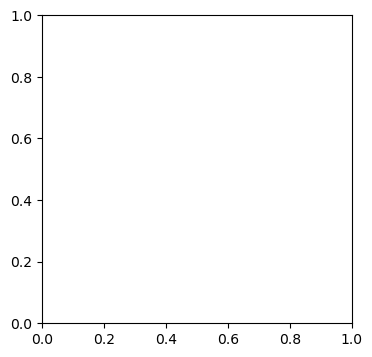

In [4]:
## Long-Tailed Distributions
sp500_px = pd.read_csv('../gunwo/dataset/sp500_data.csv.gz',compression='gzip')

nflx = sp500_px.NFLX
nflx = np.diff(np.log(nflx[nflx>0]))

fig, ax = plt.subplots(figsize=(4, 4))
stats.probplot(nflx, plot=ax)

plt.tight_layout()
plt.show()
